# Step 0: We import the database as well as the required libraries 

In [220]:
import numpy as np
from math import log
import pandas as pd
import math
import matplotlib.pyplot as plt
from fpdf import FPDF
import seaborn as sns

In [221]:
dataFF = pd.read_csv('dataFF.csv')

# Step 1: We create a function to calculate the entropy 

In [222]:
def calc_entropy(column):
    counts = np.bincount(column)
    probability = counts / len(column)
    entropy = 0
    for prob in probability:
        if prob > 0:
            entropy += prob * math.log(prob, 2)

    n = len(counts)
    max_entropy = math.log2(n)  # Maximal Entropy
    
    # Normalize entropy
    normalized_entropy = -entropy / max_entropy if max_entropy > 0 else 0

    return normalized_entropy

In [223]:
dataFF.drop(columns= ['Unnamed: 0'],inplace=True)

# Step 2: We create a dictionary to gather all the entropy of the targeted columns 

In [224]:
liste_var = ['Nb Skills', 'moyens_paiement',
       'carte_vitale', 'secteur',
       'site',
       'Diplômes nationaux et universitaires b', 'Nb caractères présentation',
       'Autres formations b','Travaux et publications b','Nb langues', 'Expériences b', 'Carac_card_1',
       'Transport', 'Parking', 'Infos', 'Coordonnées', 'Formations b',
       'nb terms card_0', 'nb terms card_3', 'nb terms card_4',
       'nb carac card_0', 'nb carac card_3', 'nb carac card_4','APL']
entropy={}
for nom_colonne in liste_var : 
    entropy[nom_colonne]=calc_entropy(dataFF[nom_colonne])
print(entropy)

{'Nb Skills': 0.7290515796809302, 'moyens_paiement': 0.6387914635976377, 'carte_vitale': 0.6387914635976377, 'secteur': 0.46365041187821593, 'site': 0.448671255831668, 'Diplômes nationaux et universitaires b': 0.9977437532321635, 'Nb caractères présentation': 0.457916968081901, 'Autres formations b': 0.516032321135186, 'Travaux et publications b': 0.06144113182539086, 'Nb langues': 0.5966519188741259, 'Expériences b': 0.3024676769952703, 'Carac_card_1': 0.9036276046567836, 'Transport': 0.9910828152170406, 'Parking': 0.8280433854781759, 'Infos': 0.5264871865239023, 'Coordonnées': 0.9014657420825256, 'Formations b': 0.4945713704594789, 'nb terms card_0': 0.779593519719293, 'nb terms card_3': 0.5902382419625161, 'nb terms card_4': 0.5035261488506756, 'nb carac card_0': 0.39295280674024646, 'nb carac card_3': 0.30136023325621036, 'nb carac card_4': 0.25281374212641433, 'APL': 0.6811363949802959}


# Step 3: We check the value of the targeted columns 

In [225]:
liste_var_descri=['Nb Skills', 'moyens_paiement',
       'carte_vitale', 'secteur',
       'site',
       'Diplômes nationaux et universitaires b', 'Nb caractères présentation',
       'Autres formations b','Travaux et publications b','Nb langues', 'Expériences b', 'Carac_card_1',
       'Transport', 'Parking', 'Infos', 'Coordonnées', 'Sans RDV', 'Formations b',
       'nb terms card_0', 'nb terms card_3', 'nb terms card_4',
       'nb carac card_0', 'nb carac card_3', 'nb carac card_4','Nb_doct_2km','Nb_doct_8km','Nb_doct_30km','Nb_doct_f_2km','Nb_doct_f_8km','Nb_doct_f_30km','Nb_doct_D_2km','Nb_doct_D_8km','Nb_doct_D_30km','Nb_doct_f_D_2km','Nb_doct_f_D_8km','Nb_doct_f_D_30km','APL','Fibre','share_Doctolib', 'Population', 'Superficie',
       'Naissances', 'Deces', 'Logements', 'Ménages', 'MED14',
       'Population_P_actif', 'Chomeurs', 'Actifs']

In [226]:
print(dataFF[liste_var_descri].describe())

         Nb Skills  moyens_paiement  carte_vitale      secteur         site  \
count  5294.000000      5294.000000   5294.000000  5294.000000  5294.000000   
mean      1.882886         0.838119      0.838119     0.925576     0.093691   
std       2.524147         0.368377      0.368377     0.503657     0.291426   
min       0.000000         0.000000      0.000000     0.000000     0.000000   
25%       0.000000         1.000000      1.000000     1.000000     0.000000   
50%       1.000000         1.000000      1.000000     1.000000     0.000000   
75%       3.000000         1.000000      1.000000     1.000000     0.000000   
max      11.000000         1.000000      1.000000     3.000000     1.000000   

       Diplômes nationaux et universitaires b  Nb caractères présentation  \
count                             5294.000000                 5294.000000   
mean                                 0.527956                  381.660370   
std                                  0.499265            

# Step 4: We create a normalized dataset between 0 and 1 and a normalized dataset in a gaussian way.

In [227]:
def normalize_dataframe(df):
    normalized_df = (df - df.min()) / (df.max() - df.min())
    return normalized_df

def normalize_gauss(df,column):
    mean = df[column].mean()  # Calculate the mean
    std = df[column].std()    # Calculate standard error
    
    # Normalize the column
    normalized_column = (df[column] - mean) / std
    
    return normalized_column

liste_var_a_norm = ['Nb Skills', 'moyens_paiement',
       'carte_vitale',
       'site', 'Nb caractères présentation','Nb langues',  'Carac_card_1',
       'Transport', 'Parking', 'Coordonnées', 'Sans RDV', 
       'nb terms card_0', 'nb terms card_3', 'nb terms card_4',
       'nb carac card_0', 'nb carac card_3', 'nb carac card_4','Diplômes nationaux et universitaires b','Autres formations b','Expériences b','Formations b','Travaux et publications b']
dataFF_red = dataFF[liste_var_a_norm]
dataFF_red_norm01 = normalize_dataframe(dataFF_red)
dataFF_red_norm01 = pd.concat([dataFF_red_norm01,dataFF[['gender','codecommunecoordstructure3','RPPS','Nb_prix', 'Prix_min', 'Prix_max','Population', 'Superficie',
       'Naissances', 'Deces', 'Logements', 'Ménages', 'MED14',
       'Population_P_actif', 'Chomeurs', 'Actifs','share_F',"Population standardisée par la consommation de soins par tranche d'âge",'secteur','Nb_doct_2km','Nb_doct_8km','Nb_doct_30km','Nb_doct_f_2km','Nb_doct_f_8km','Nb_doct_f_30km','same_gender_2km','same_gender_8km','same_gender_30km','Nb_doct_D_2km','Nb_doct_D_8km','Nb_doct_D_30km','Nb_doct_f_D_2km','Nb_doct_f_D_8km','Nb_doct_f_D_30km','APL','Fibre','share_Doctolib']]],axis=1)
dataFF_red_norm_gauss = dataFF[liste_var_a_norm]
for column in dataFF_red_norm_gauss.columns :
    dataFF_red_norm_gauss[column]=normalize_gauss(dataFF_red_norm_gauss,column)
dataFF_red_norm_gauss = pd.concat([dataFF_red_norm_gauss,dataFF[['gender','codecommunecoordstructure3','RPPS','Nb_prix', 'Prix_min', 'Prix_max','share_F','Population', 'Superficie',
       'Naissances', 'Deces', 'Logements', 'Ménages', 'MED14',
       'Population_P_actif', 'Chomeurs', 'Actifs',"Population standardisée par la consommation de soins par tranche d'âge",'MED14','secteur','Nb_doct_2km','Nb_doct_8km','Nb_doct_30km','Nb_doct_f_2km','Nb_doct_f_8km','Nb_doct_f_30km','same_gender_2km','same_gender_8km','same_gender_30km','Nb_doct_D_2km','Nb_doct_D_8km','Nb_doct_D_30km','Nb_doct_f_D_2km','Nb_doct_f_D_8km','Nb_doct_f_D_30km','APL','Fibre','share_Doctolib']]],axis=1)

C:\Users\agath\AppData\Local\Temp\ipykernel_9412\2237488675.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataFF_red_norm_gauss[column]=normalize_gauss(dataFF_red_norm_gauss,column)


# Step 5: We verify the values of the dataset 

In [228]:
dataFF_red_norm01

,Nb Skills,moyens_paiement,carte_vitale,site,Nb caractères présentation,Nb langues,Carac_card_1,Transport,Parking,Coordonnées,...,same_gender_30km,Nb_doct_D_2km,Nb_doct_D_8km,Nb_doct_D_30km,Nb_doct_f_D_2km,Nb_doct_f_D_8km,Nb_doct_f_D_30km,APL,Fibre,share_Doctolib
0,0.000000,1.0,1.0,0.0,0.053462,0.500,0.212435,0.0,0.0,0.0,...,0.003207,0.000071,0.000160,0.000214,0.000000,0.000000,0.000000,5.0570,0.859339,0.030534
1,0.181818,1.0,1.0,0.0,0.042293,0.125,0.215026,0.0,0.0,0.0,...,0.058234,0.000324,0.000647,0.007117,0.000000,0.000000,0.000000,1.8850,0.951607,0.200000
2,0.363636,1.0,1.0,0.0,0.067014,0.125,0.217617,0.0,0.0,0.0,...,0.002260,0.000080,0.000147,0.000257,0.000057,0.000057,0.000057,4.4720,0.874381,0.035036
3,0.363636,1.0,1.0,0.0,0.067014,0.125,0.217617,0.0,0.0,0.0,...,0.039978,0.000267,0.000800,0.002932,0.000000,0.000000,0.000000,4.0770,0.875038,0.100000
4,0.000000,1.0,1.0,1.0,0.042293,0.250,0.525907,1.0,0.0,1.0,...,0.012737,0.000194,0.001178,0.001545,0.000130,0.000130,0.000130,4.1710,0.960714,0.043478
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5289,0.090909,1.0,1.0,0.0,0.053016,0.125,0.536269,1.0,0.0,1.0,...,0.271865,0.027698,0.027698,0.027698,0.017218,0.017218,0.017218,4.1504,0.978945,0.054452
5290,0.000000,1.0,1.0,0.0,0.042293,0.250,0.455959,0.0,0.0,1.0,...,0.028621,0.000611,0.000815,0.002241,0.000306,0.000306,0.000306,4.2120,0.902337,0.181818
5291,0.000000,0.0,0.0,0.0,0.000000,0.000,0.000000,0.0,0.0,0.0,...,0.026020,0.000042,0.001002,0.003300,0.000000,0.000000,0.000000,2.3100,0.938029,0.038462
5292,0.000000,0.0,0.0,0.0,0.000000,0.000,0.000000,0.0,0.0,0.0,...,0.012164,0.000052,0.001085,0.001847,0.000026,0.000026,0.000026,3.8180,0.903929,0.054054


In [229]:
print(dataFF_red_norm_gauss)

      Nb Skills  moyens_paiement  carte_vitale      site  \
0     -0.745950         0.439445      0.439445 -0.321492   
1      0.046397         0.439445      0.439445 -0.321492   
2      0.838744         0.439445      0.439445 -0.321492   
3      0.838744         0.439445      0.439445 -0.321492   
4     -0.745950         0.439445      0.439445  3.109913   
...         ...              ...           ...       ...   
5289  -0.349776         0.439445      0.439445 -0.321492   
5290  -0.745950         0.439445      0.439445 -0.321492   
5291  -0.745950        -2.275167     -2.275167 -0.321492   
5292  -0.745950        -2.275167     -2.275167 -0.321492   
5293   0.046397         0.439445      0.439445 -0.321492   

      Nb caractères présentation  Nb langues  Carac_card_1  Transport  \
0                      -0.062564    2.831332     -0.927340  -0.894381   
1                      -0.269636    0.017188     -0.913786  -0.894381   
2                       0.188683    0.017188     -0.900232  

# Step 6: We rename the columns 

In [230]:
dataFF.columns

Index(['Unnamed: 0.1', 'level_0', 'identifiantpp_x',
       'identificationnationalepp', 'codecivilité', 'nomdexercice',
       'prénomdexercice', 'codecatégorieprofessionnelle', 'codesavoirfaire',
       'libellésavoirfaire',
       ...
       'Nb_doct_D_2km', 'Nb_doct_D_8km', 'Nb_doct_D_30km', 'Nb_doct_f_D_2km',
       'Nb_doct_f_D_8km', 'Nb_doct_f_D_30km', '_merge', 'same_gender_2km',
       'same_gender_8km', 'same_gender_30km'],
      dtype='object', length=139)

In [231]:
dataFF_red_norm01.rename(columns={"Population standardisée par la consommation de soins par tranche d'âge":'Standardized_population','moyens_paiement':'Payment_method','carte_vitale':'Social_security_card','secteur':'Sector','Présentation':'Presentation','Nb Skills':'Nb_Skills','Diplômes nationaux et universitaires b':'National_&_university_degrees_b','Nb caractères présentation':'Nb_charac_presentation','Autres formations b':'Other_formations_b','Travaux et publications b':'Work_&_publications_b','Nb langues':'Nb_languages','Expériences b':'Experiences_b','Sans RDV':'Without_appointment','Formations b':'Formations_b','nb terms card_0':'nb_terms_card_0','nb terms card_3':'nb_terms_card_3','nb terms card_4':'nb_terms_card_4','nb carac card_0':'nb_charac_card_0','nb carac card_3':'nb_charac_card_3','nb carac card_4':'nb_charac_card_4','Coordonnées':'Contact','Nb_prix':'Nb_price','Prix_min':'Min_price','Prix_max':'Max_price','Carac_card_1':'nb_charac_card_1'},inplace=True)
dataFF_red_norm_gauss.rename(columns={"Population standardisée par la consommation de soins par tranche d'âge":'Standardized_population','moyens_paiement':'Payment_method','carte_vitale':'Social_security_card','secteur':'Sector','Présentation':'Presentation','Nb Skills':'Nb_Skills','Diplômes nationaux et universitaires b':'National_&_university_degrees_b','Nb caractères présentation':'Nb_charac_presentation','Autres formations b':'Other_formations_b','Travaux et publications b':'Work_&_publications_b','Nb langues':'Nb_languages','Expériences b':'Experiences_b','Sans RDV':'Without_appointment','Formations b':'Formations_b','nb terms card_0':'nb_terms_card_0','nb terms card_3':'nb_terms_card_3','nb terms card_4':'nb_terms_card_4','nb carac card_0':'nb_charac_card_0','nb carac card_3':'nb_charac_card_3','nb carac card_4':'nb_charac_card_4','Coordonnées':'Contact','Nb_prix':'Nb_price','Prix_min':'Min_price','Prix_max':'Max_price','Carac_card_1':'nb_charac_card_1'},inplace=True)
dataFF.rename(columns={"Population standardisée par la consommation de soins par tranche d'âge":'Standardized_population','moyens_paiement':'Payment_method','carte_vitale':'Social_security_card','secteur':'Sector','Présentation':'Presentation','Nb Skills':'Nb_Skills','Diplômes nationaux et universitaires b':'National_&_university_degrees_b','Nb caractères présentation':'Nb_charac_presentation','Autres formations b':'Other_formations_b','Travaux et publications b':'Work_&_publications_b','Nb langues':'Nb_languages','Expériences b':'Experiences_b','Sans RDV':'Without_appointment','Formations b':'Formations_b','nb terms card_0':'nb_terms_card_0','nb terms card_3':'nb_terms_card_3','nb terms card_4':'nb_terms_card_4','nb carac card_0':'nb_charac_card_0','nb carac card_3':'nb_charac_card_3','nb carac card_4':'nb_charac_card_4','Coordonnées':'Contact','Nb_prix':'Nb_price','Prix_min':'Min_price','Prix_max':'Max_price','Carac_card_1':'nb_charac_card_1'},inplace=True)

# Step 7 : We create a new column to sum all the indicator in only one variable

In [232]:
dataFF_red_norm_gauss['sum']=dataFF_red_norm_gauss['Nb_Skills']+dataFF_red_norm_gauss['Payment_method']+dataFF_red_norm_gauss['Social_security_card']+dataFF_red_norm_gauss['site']+dataFF_red_norm_gauss['Nb_charac_presentation']+dataFF_red_norm_gauss['Nb_languages']+dataFF_red_norm_gauss['nb_charac_card_1']+dataFF_red_norm_gauss['Transport']+dataFF_red_norm_gauss['Parking']+dataFF_red_norm_gauss['nb_terms_card_0']+dataFF_red_norm_gauss['nb_terms_card_3']+dataFF_red_norm_gauss['nb_terms_card_4']+dataFF_red_norm_gauss['nb_charac_card_0']+dataFF_red_norm_gauss['nb_charac_card_3']+dataFF_red_norm_gauss['nb_charac_card_4']+dataFF_red_norm_gauss['National_&_university_degrees_b']+dataFF_red_norm_gauss['Other_formations_b']+dataFF_red_norm_gauss['Experiences_b']+dataFF_red_norm_gauss['Formations_b']+dataFF_red_norm_gauss['Work_&_publications_b']

# Step 8: We export the two data base 

In [233]:
dataFF_red_norm01.to_csv('dataFF_red_norm01.csv')
dataFF_red_norm_gauss.to_csv('dataFF_red_norm_gauss.csv')

# Step 9: We create a pdf with the description of each column

In [234]:
liste_var_info=['Nb_Skills', 'Payment_method',
       'Social_security_card', 'Sector',
       'site',
       'National_&_university_degrees_b', 'Nb_charac_presentation',
       'Other_formations_b','Work_&_publications_b','Nb_languages', 'Experiences_b', 'Formations_b', 'nb_charac_card_1',
       'Transport', 'Parking', 'Infos', 'Contact', 'Without_appointment', 'Nb_price', 'Min_price','Max_price',
       'nb_terms_card_0', 'nb_terms_card_3', 'nb_terms_card_4',
       'nb_charac_card_0', 'nb_charac_card_3', 'nb_charac_card_4','gender']
# Obtain descriptive statistics
desc = dataFF[liste_var_info].describe()


# Initialize the PDF
pdf = FPDF()
pdf.add_page()
pdf.set_font("Arial", size=12)
pdf.cell(200, 10, txt="Statistiques Descriptives par Colonne (Deux Colonnes)", ln=True, align='C')
pdf.ln(10)
column_width = pdf.w / 2 - 10 
columns = list(desc.columns)
for i in range(0, len(columns), 2):
    if pdf.get_y() > 270:  
        pdf.add_page()
    pdf.set_x(10)
    pdf.set_font("Arial", 'B', 12)
    pdf.cell(column_width, 10, txt=f"Colonne: {columns[i]}", ln=False)
    if i + 1 < len(columns):
        pdf.set_x(column_width + 20) 
        pdf.cell(column_width, 10, txt=f"Colonne: {columns[i+1]}", ln=True) 
    else:
        pdf.ln(10) 
    for stat_name in desc.index:
        pdf.set_x(10)
        pdf.set_font("Arial", size=12)
        stat_value_col1 = desc.loc[stat_name, columns[i]]
        pdf.cell(column_width, 10, txt=f"{stat_name}: {stat_value_col1:.2f}", ln=False)

        if i + 1 < len(columns):
            pdf.set_x(column_width + 20)
            stat_value_col2 = desc.loc[stat_name, columns[i+1]]
            pdf.cell(column_width, 10, txt=f"{stat_name}: {stat_value_col2:.2f}", ln=True)
        else:
            pdf.ln(10) 
    pdf.ln(5)

pdf_file = "statistiques_descriptives_deux_colonnes.pdf"
pdf.output(pdf_file)

print(f"Le fichier PDF a été créé : {pdf_file}")

Le fichier PDF a été créé : statistiques_descriptives_deux_colonnes.pdf


In [235]:
liste_var_comp=['Standardized_population','APL','Fibre','share_Doctolib','Population', 'Superficie','Naissances', 'Deces', 'Logements','Ménages', 
                'MED14', 'Population_P_actif','Chomeurs', 'Actifs','Nb_doct_2km','Nb_doct_8km','Nb_doct_30km','Nb_doct_f_2km','Nb_doct_f_8km',
                'Nb_doct_f_30km','same_gender_2km','same_gender_8km','same_gender_30km','Nb_doct_D_2km','Nb_doct_D_8km','Nb_doct_D_30km','Nb_doct_f_D_2km','Nb_doct_f_D_8km','Nb_doct_f_D_30km']

# Obtain descriptive statistics
desc = dataFF[liste_var_comp].describe()

# Initialize the PDF
pdf = FPDF()
pdf.add_page()
pdf.set_font("Arial", size=12)
pdf.cell(200, 10, txt="Statistiques Descriptives par Colonne", ln=True, align='C')
pdf.ln(10)
column_width = pdf.w / 2 - 10 
columns = list(desc.columns)
for i in range(0, len(columns), 2):
    if pdf.get_y() > 270:  
        pdf.add_page()
    pdf.set_x(10)
    pdf.set_font("Arial", 'B', 12)
    pdf.cell(column_width, 10, txt=f"Colonne: {columns[i]}", ln=False)
    if i + 1 < len(columns):
        pdf.set_x(column_width + 20) 
        pdf.cell(column_width, 10, txt=f"Colonne: {columns[i+1]}", ln=True) 
    else:
        pdf.ln(10) 
    for stat_name in desc.index:
        pdf.set_x(10)
        pdf.set_font("Arial", size=12)
        stat_value_col1 = desc.loc[stat_name, columns[i]]
        pdf.cell(column_width, 10, txt=f"{stat_name}: {stat_value_col1:.2f}", ln=False)

        if i + 1 < len(columns):
            pdf.set_x(column_width + 20)
            stat_value_col2 = desc.loc[stat_name, columns[i+1]]
            pdf.cell(column_width, 10, txt=f"{stat_name}: {stat_value_col2:.2f}", ln=True)
        else:
            pdf.ln(10) 
    pdf.ln(5)

pdf_file = "statistiques_descriptives_deux_colonnes_2.pdf"
pdf.output(pdf_file)

print(f"Le fichier PDF a été créé : {pdf_file}")

Le fichier PDF a été créé : statistiques_descriptives_deux_colonnes_2.pdf


# Step 10: We plot significative graphs  

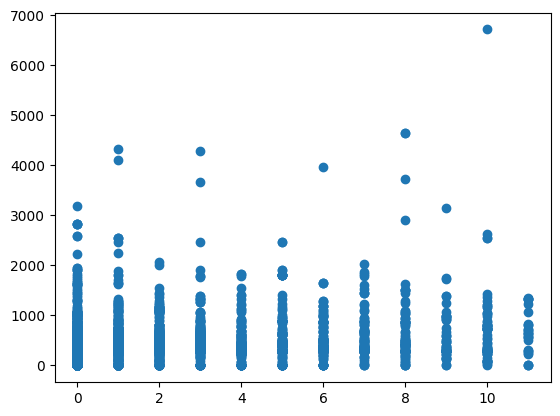

In [236]:
plt.scatter(dataFF['Nb_Skills'],dataFF['Nb_charac_presentation'])

4.845679


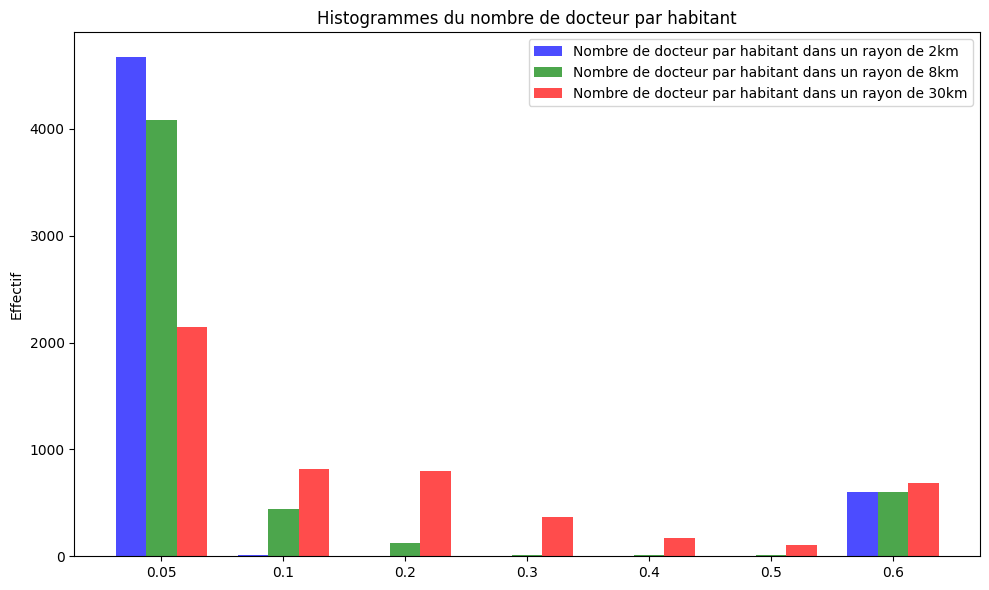

In [237]:
data1 = dataFF['Nb_doct_2km']
data2 = dataFF['Nb_doct_8km']
data3 = dataFF['Nb_doct_30km']

maxi = dataFF['Nb_doct_30km'].max()
print(maxi)

bins = [0,0.05,0.1,0.2,0.3,0.4,0.5,0.6]  
width = 0.25  


hist1, bin_edges1 = np.histogram(data1, bins=bins)
hist2, bin_edges2 = np.histogram(data2, bins=bins)
hist3, bin_edges3 = np.histogram(data3, bins=bins)

x1 = np.arange(len(hist1)) 
x2 = x1 + width  
x3 = x1 + 2 * width  

plt.figure(figsize=(10, 6))

plt.bar(x1, hist1, width=width, label='Nombre de docteur par habitant dans un rayon de 2km', color='blue', alpha=0.7)
plt.bar(x2, hist2, width=width, label='Nombre de docteur par habitant dans un rayon de 8km', color='green', alpha=0.7)
plt.bar(x3, hist3, width=width, label='Nombre de docteur par habitant dans un rayon de 30km', color='red', alpha=0.7)

plt.title('Histogrammes du nombre de docteur par habitant')
plt.ylabel('Effectif')
plt.xticks(x1 + width, bins[1:]) 

plt.legend()

plt.tight_layout()  
plt.show()


Text(0.5, 1.0, 'Number of doctors compared to the level of filling of Présentation')

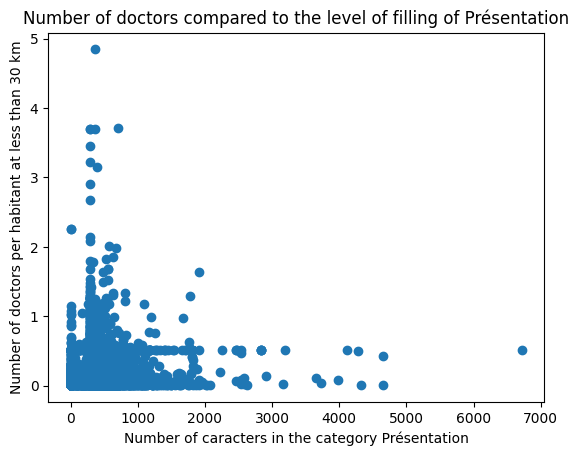

In [238]:
plt.scatter(dataFF['Nb_charac_presentation'],dataFF['Nb_doct_30km'])
plt.xlabel('Number of caracters in the category Présentation')
plt.ylabel('Number of doctors per habitant at less than 30 km')
plt.title('Number of doctors compared to the level of filling of Présentation')

In [239]:
dataFF['Nb_charac_presentation'].value_counts()

Nb_charac_presentation
284.0    1955
0.0       589
281.0     379
351.0      31
380.0      28
         ... 
914.0       1
132.0       1
50.0        1
605.0       1
210.0       1
Name: count, Length: 869, dtype: int64

In [240]:
dataFF[dataFF['Nb_charac_presentation']==284]

,Unnamed: 0.1,level_0,identifiantpp_x,identificationnationalepp,codecivilité,nomdexercice,prénomdexercice,codecatégorieprofessionnelle,codesavoirfaire,libellésavoirfaire,...,Nb_doct_D_2km,Nb_doct_D_8km,Nb_doct_D_30km,Nb_doct_f_D_2km,Nb_doct_f_D_8km,Nb_doct_f_D_30km,_merge,same_gender_2km,same_gender_8km,same_gender_30km
1,1,205,10000029479,810000029479,M,GUBERT,Jean-Louis,C,SM53,Spécialiste en Médecine Générale,...,0.000324,0.000647,0.007117,0.000000,0.000000,0.000000,both,0.000971,0.002588,0.058234
4,4,314,10000041250,810000041250,MME,JUSTAUME,GWAENAEL,C,SM26,Qualifié en Médecine Générale,...,0.000194,0.001178,0.001545,0.000130,0.000130,0.000130,both,0.002766,0.009928,0.012737
5,5,321,10000041961,810000041961,MME,LOUCHEZ-BONNES,EMMANUELLE,C,SM53,Spécialiste en Médecine Générale,...,0.000110,0.000147,0.000259,0.000072,0.000072,0.000072,both,0.001231,0.001408,0.002400
16,16,538,10000215078,810000215078,M,GUEZ,JACQUES,C,SM53,Spécialiste en Médecine Générale,...,0.027698,0.027698,0.027698,0.017218,0.017218,0.017218,both,0.236806,0.236806,0.236806
22,22,621,10000244581,810000244581,M,MALLET,JEAN-BERNARD,C,SM26,Qualifié en Médecine Générale,...,0.027698,0.027698,0.027698,0.017218,0.017218,0.017218,both,0.236806,0.236806,0.236806
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5285,5285,130865,10102337325,810102337325,MME,BOUJNAH-BRITEL,Mouna,C,SM53,Spécialiste en Médecine Générale,...,0.000077,0.000890,0.004448,0.000039,0.000039,0.000039,both,0.000967,0.004719,0.024214
5286,5286,130934,10103938741,810103938741,MME,CHAZAI,Astrid,C,SM53,Spécialiste en Médecine Générale,...,0.000155,0.000599,0.002184,0.000135,0.000135,0.000135,both,0.000676,0.002937,0.014958
5287,5287,130935,10103938741,810103938741,MME,CHAZAI,Astrid,C,SM53,Spécialiste en Médecine Générale,...,0.000184,0.000479,0.001105,0.000101,0.000101,0.000101,both,0.000700,0.002671,0.006282
5290,5290,131152,10107681016,810107681016,MME,WEINS,Galia,C,SM53,Spécialiste en Médecine Générale,...,0.000611,0.000815,0.002241,0.000306,0.000306,0.000306,both,0.004482,0.006009,0.028621


Text(0.5, 1.0, 'Number of doctors compared to the number of skills mentioned')

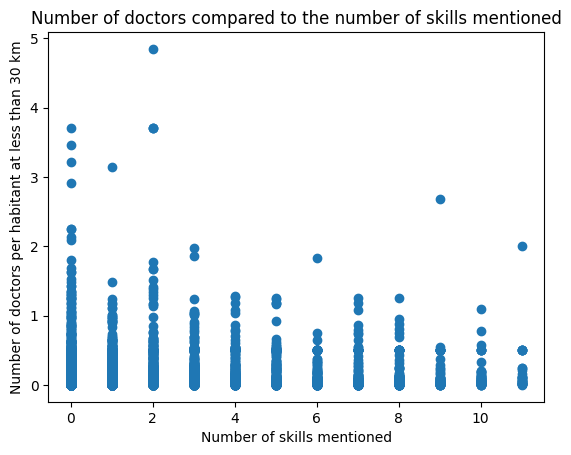

In [241]:
plt.scatter(dataFF['Nb_Skills'],dataFF['Nb_doct_30km'])
plt.xlabel('Number of skills mentioned')
plt.ylabel('Number of doctors per habitant at less than 30 km')
plt.title('Number of doctors compared to the number of skills mentioned')

Text(0.5, 1.0, 'Number of doctors compared to the ratio of doctors on Doctolib')

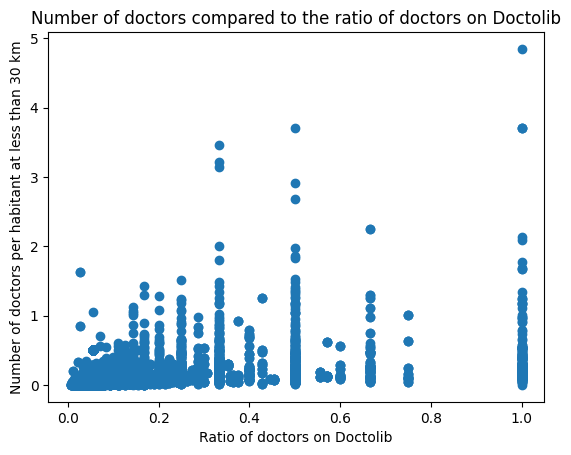

In [242]:
plt.scatter(dataFF['share_Doctolib'],dataFF['Nb_doct_30km'])
plt.xlabel('Ratio of doctors on Doctolib')
plt.ylabel('Number of doctors per habitant at less than 30 km')
plt.title('Number of doctors compared to the ratio of doctors on Doctolib')

Text(0.5, 1.0, 'Number of doctors per habitant in function of the filling of the Work & publications section')

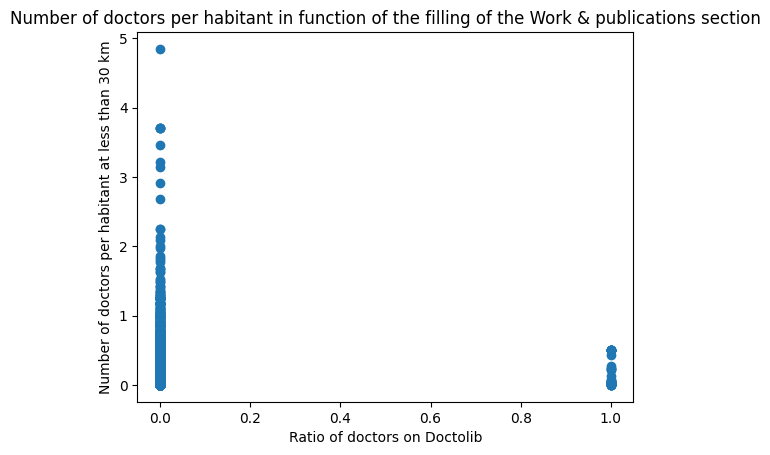

In [243]:
plt.scatter(dataFF['Work_&_publications_b'],dataFF['Nb_doct_30km'])
plt.xlabel('Ratio of doctors on Doctolib')
plt.ylabel('Number of doctors per habitant at less than 30 km')
plt.title('Number of doctors per habitant in function of the filling of the Work & publications section')

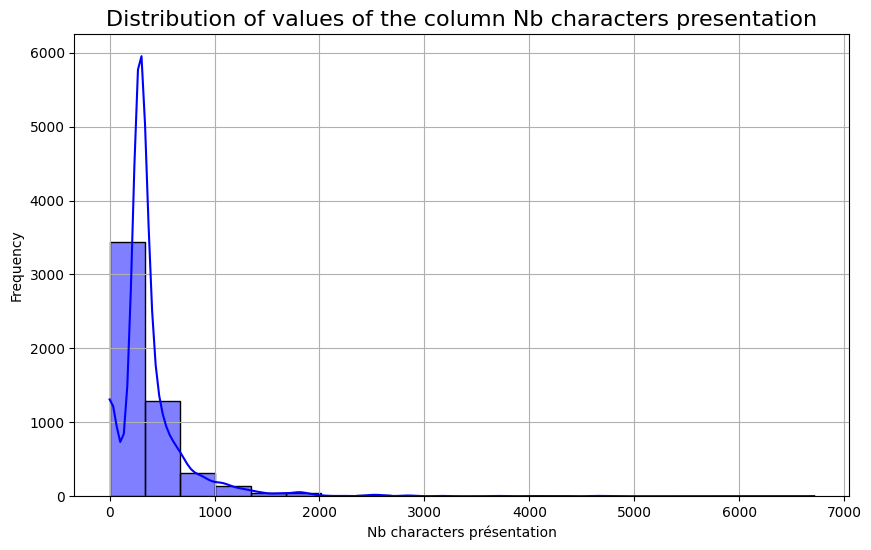

In [244]:
plt.figure(figsize=(10, 6))
sns.histplot(dataFF['Nb_charac_presentation'], kde=True, bins=20, color='blue')
plt.title(f"Distribution of values of the column {'Nb characters presentation'}", fontsize=16)
plt.xlabel('Nb characters présentation')
plt.ylabel("Frequency")
plt.grid(True)

plt.savefig('nb_carac')

plt.show()

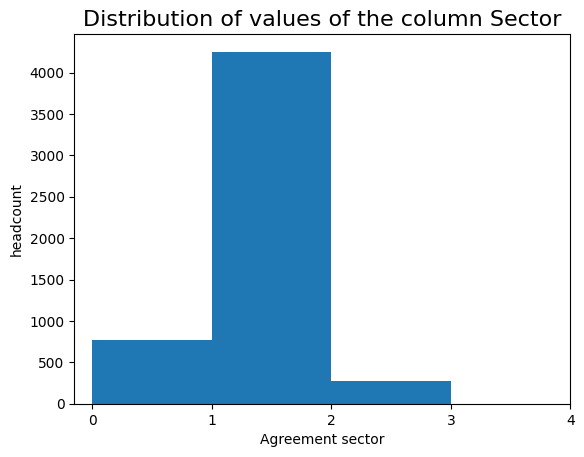

In [245]:
plt.hist(dataFF['Sector'],bins=[0,1,2,3])
plt.xticks([0,1,2,3,4]) 
plt.title(f"Distribution of values of the column {'Sector'}", fontsize=16)
plt.xlabel('Agreement sector')
plt.ylabel("headcount")

plt.savefig('sector')

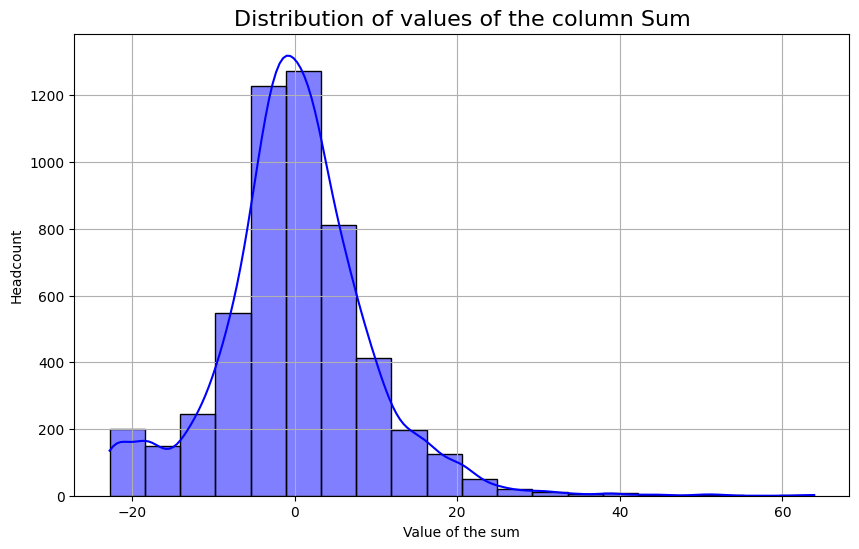

In [246]:
plt.figure(figsize=(10, 6))
sns.histplot(dataFF_red_norm_gauss['sum'], kde=True, bins=20, color='blue')

plt.title(f"Distribution of values of the column {'Sum'}", fontsize=16)
plt.xlabel('Value of the sum')
plt.ylabel("Headcount")
plt.grid(True)

plt.savefig('sum')

plt.show()

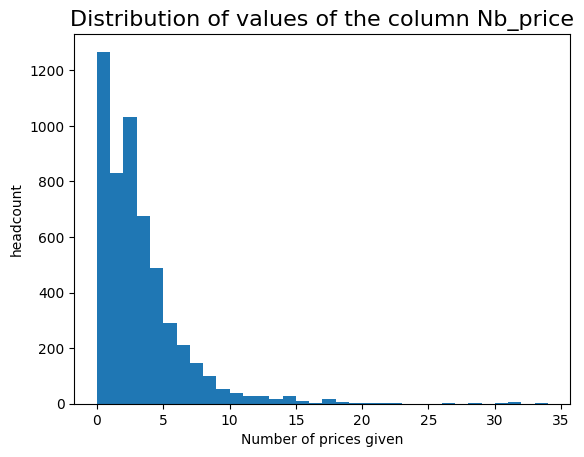

In [247]:
plt.hist(dataFF['Nb_price'], bins=[f for f in range(35)])
plt.title(f"Distribution of values of the column {'Nb_price'}", fontsize=16)
plt.xlabel('Number of prices given')
plt.ylabel("headcount")

plt.savefig('price')

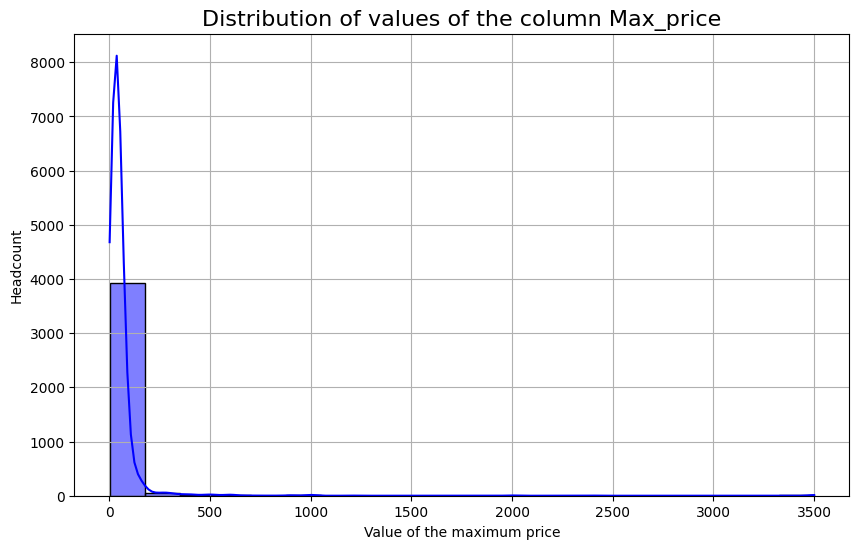

In [248]:
plt.figure(figsize=(10, 6))
sns.histplot(dataFF_red_norm_gauss['Max_price'], kde=True, bins=20, color='blue')

plt.title(f"Distribution of values of the column {'Max_price'}", fontsize=16)
plt.xlabel('Value of the maximum price')
plt.ylabel("Headcount")
plt.grid(True)

plt.savefig('max')
plt.show()

In [249]:
maxi = dataFF_red_norm_gauss['Max_price'].max()
dataFF_red_norm_gauss[dataFF_red_norm_gauss['Max_price']==maxi]

,Nb_Skills,Payment_method,Social_security_card,site,Nb_charac_presentation,Nb_languages,nb_charac_card_1,Transport,Parking,Contact,...,Nb_doct_D_2km,Nb_doct_D_8km,Nb_doct_D_30km,Nb_doct_f_D_2km,Nb_doct_f_D_8km,Nb_doct_f_D_30km,APL,Fibre,share_Doctolib,sum
674,3.215785,0.439445,0.439445,-0.321492,0.947947,4.707428,1.593703,1.117881,1.683128,0.681741,...,0.000096,0.000216,0.001057,0.000048,0.000048,0.000048,2.121,0.943970,0.024096,38.607656
675,3.215785,0.439445,0.439445,-0.321492,0.947947,4.707428,1.593703,1.117881,1.683128,0.681741,...,0.000167,0.000556,0.003837,0.000000,0.000000,0.000000,2.140,0.974467,0.230769,38.607656
676,3.215785,0.439445,0.439445,-0.321492,0.947947,4.707428,1.593703,1.117881,1.683128,0.681741,...,0.000626,0.002224,0.005004,0.000278,0.000278,0.000278,3.160,0.901976,0.136364,38.607656
677,3.215785,0.439445,0.439445,-0.321492,0.947947,4.707428,1.593703,1.117881,1.683128,0.681741,...,0.001022,0.005317,0.014928,0.000409,0.000409,0.000409,2.653,0.918855,0.125000,38.607656
678,3.215785,0.439445,0.439445,-0.321492,0.947947,4.707428,1.593703,1.117881,1.683128,0.681741,...,0.000074,0.000386,0.001343,0.000018,0.000018,0.000018,1.772,0.954486,0.052632,38.607656


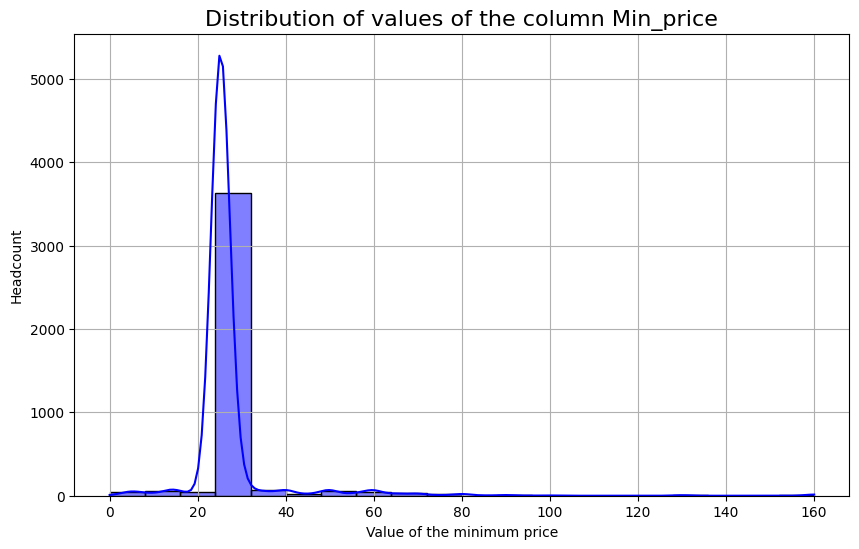

In [250]:
plt.figure(figsize=(10, 6))
sns.histplot(dataFF_red_norm_gauss['Min_price'], kde=True, bins=20, color='blue')

plt.title(f"Distribution of values of the column {'Min_price'}", fontsize=16)
plt.xlabel('Value of the minimum price')
plt.ylabel("Headcount")
plt.grid(True)

plt.savefig('min')

plt.show()

# Step 11: We export the description of the data base in Latex 

In [251]:
stats = dataFF[liste_var_info].describe()

stats_transposed = stats.T
latex_table = stats_transposed.to_latex(index=True, float_format="%.2f")

print(latex_table)

\begin{tabular}{lrrrrrrrr}
\toprule
 & count & mean & std & min & 25% & 50% & 75% & max \\
\midrule
Nb_Skills & 5294.00 & 1.88 & 2.52 & 0.00 & 0.00 & 1.00 & 3.00 & 11.00 \\
Payment_method & 5294.00 & 0.84 & 0.37 & 0.00 & 1.00 & 1.00 & 1.00 & 1.00 \\
Social_security_card & 5294.00 & 0.84 & 0.37 & 0.00 & 1.00 & 1.00 & 1.00 & 1.00 \\
Sector & 5294.00 & 0.93 & 0.50 & 0.00 & 1.00 & 1.00 & 1.00 & 3.00 \\
site & 5294.00 & 0.09 & 0.29 & 0.00 & 0.00 & 0.00 & 0.00 & 1.00 \\
National_&_university_degrees_b & 5294.00 & 0.53 & 0.50 & 0.00 & 0.00 & 1.00 & 1.00 & 1.00 \\
Nb_charac_presentation & 5294.00 & 381.66 & 362.19 & 0.00 & 284.00 & 284.00 & 413.00 & 6715.00 \\
Other_formations_b & 5294.00 & 0.12 & 0.32 & 0.00 & 0.00 & 0.00 & 0.00 & 1.00 \\
Work_&_publications_b & 5294.00 & 0.01 & 0.08 & 0.00 & 0.00 & 0.00 & 0.00 & 1.00 \\
Nb_languages & 5294.00 & 0.98 & 1.07 & 0.00 & 0.00 & 1.00 & 2.00 & 8.00 \\
Experiences_b & 5294.00 & 0.05 & 0.23 & 0.00 & 0.00 & 0.00 & 0.00 & 1.00 \\
Formations_b & 5294.00 

In [252]:
stats = dataFF[liste_var_comp].describe()

stats_transposed = stats.T
latex_table = stats_transposed.to_latex(index=True, float_format="%.2f")

print(latex_table)

\begin{tabular}{lrrrrrrrr}
\toprule
 & count & mean & std & min & 25% & 50% & 75% & max \\
\midrule
Standardized_population & 5294.00 & 46400.10 & 74159.67 & 171.48 & 5292.31 & 15591.63 & 50309.53 & 457270.37 \\
APL & 5294.00 & 3.65 & 1.13 & 0.20 & 2.82 & 3.68 & 4.22 & 9.60 \\
Fibre & 5294.00 & 0.89 & 0.17 & 0.00 & 0.88 & 0.93 & 0.97 & 1.00 \\
share_Doctolib & 5294.00 & 0.18 & 0.21 & 0.01 & 0.05 & 0.08 & 0.25 & 1.00 \\
Population & 5294.00 & 330125.99 & 699025.77 & 178.00 & 4872.00 & 23416.00 & 138569.25 & 2220445.00 \\
Superficie & 5294.00 & 41.73 & 51.31 & 0.58 & 9.29 & 19.62 & 50.39 & 323.98 \\
Naissances & 5294.00 & 4333.34 & 8979.88 & 0.00 & 50.00 & 299.50 & 1797.00 & 28384.00 \\
Deces & 5294.00 & 2222.83 & 4476.70 & 0.00 & 50.00 & 199.00 & 1088.00 & 14056.00 \\
Logements & 5294.00 & 196781.35 & 427526.34 & 97.00 & 2525.89 & 11523.61 & 80676.01 & 1362181.88 \\
Ménages & 5294.00 & 151082.60 & 325668.25 & 79.00 & 2042.00 & 9708.50 & 62756.50 & 1036464.00 \\
MED14 & 5294.00 & 21413.5